<a href="https://colab.research.google.com/github/And2300/IA025_2022S1/blob/main/Aula1_Exerc%C3%ADcios_20210718.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esté um notebook Colab contendo exercícios de programação em python, numpy e pytorch.

## Coloque seu nome

In [1]:
print('Meu nome é: Andersson')

Meu nome é: Andersson


# Parte 1:

##Exercícios de Processamento de Dados

Nesta parte pode-se usar as bibliotecas nativas do python como a `collections`, `re` e `random`. Também pode-se usar o NumPy.

##Exercício 1.1
Crie um dicionário com os `k` itens mais frequentes de uma lista.

Por exemplo, dada a lista de itens `L=['a', 'a', 'd', 'b', 'd', 'c', 'e', 'a', 'b', 'e', 'e', 'a']` e `k=2`, o resultado deve ser um dicionário cuja chave é o item e o valor é a sua frequência: {'a': 4, 'e': 3}

HINT: https://rico-schmidt.name/pymotw-3/collections/counter.html

In [31]:
import collections 
def top_k(L, k):
    # Escreva aqui o código
    c=collections.Counter(L).most_common(k)
    return dict(c)

Mostre que sua implementação está correta usando uma entrada com poucos itens:

In [32]:
L = ['f', 'a', 'a', 'd', 'b', 'd', 'c', 'e', 'a', 'b', 'e', 'e', 'a', 'd']
k = 3
resultado = top_k(L=L, k=k)
print(f'resultado: {resultado}')

resultado: {'a': 4, 'd': 3, 'e': 3}


Mostre que sua implementação é eficiente usando uma entrada com 10M de itens:

In [33]:
import random
L = random.choices('abcdefghijklmnopqrstuvwxyz', k=10_000_000)
k = 10000

In [34]:
%%timeit
resultado = top_k(L=L, k=k)

1 loop, best of 5: 516 ms per loop


## Exercício 1.2

Em processamento de linguagem natural, é comum convertemos as palavras de um texto para uma lista de identificadores dessas palavras. Dado o dicionário `V` abaixo onde as chaves são palavras e os valores são seus respectivos identificadores, converta o texto `D` para uma lista de identificadores.

Palavras que não existem no dicionário deverão ser convertidas para o identificador do token `unknown`.

O código deve ser insensível a maiúsculas (case-insensitive).

Se atente que pontuações (vírgulas, ponto final, etc) também são consideradas palavras.

HINT: 
* https://www.w3schools.com/python/python_regex.asp
* https://www.programiz.com/python-programming/regex

In [40]:
import re
def tokens_to_ids(text, vocabulary):
    # escreva o código aqui.
    tokens = re.findall(r"[\w']+|[.,!?;]", text.lower()) #[\w']: Matches any alphanumeric character, [.,!?;] : Matches any non-alphanumeric character and space
    ids = []
    for token in tokens:
      ids.append(vocabulary.get(token, vocabulary['unknown']))
    return ids

Mostre que sua implementação esta correta com um exemplo pequeno:

---



In [41]:
V = {'eu': 1, 'de': 2, 'gosto': 3, 'comer': 4, '.': 5, 'unknown': -1}
D = 'Eu gosto de comer pizza.'

print(tokens_to_ids(D, V))

[1, 3, 2, 4, -1, 5]


Mostre que sua implementação é eficiente com um exemplo grande:

In [42]:
V = {'eu': 1, 'de': 2, 'gosto': 3, 'comer': 4, '.': 5, 'unknown': -1}
D = ' '.join(1_000_000 * ['Eu gosto de comer pizza.'])

In [43]:
%%timeit
resultado = tokens_to_ids(D, V)

1 loop, best of 5: 2.85 s per loop


## Exercício 1.3

Em aprendizado profundo é comum termos que lidar com arquivos muito grandes.

Dado um arquivo de texto onde cada item é separado por `\n`, escreva um programa que amostre `k` itens desse arquivo aleatoriamente.

Nota 1: Assuma amostragem de uma distribuição uniforme, ou seja, todos os itens tem a mesma probablidade de amostragem.

Nota 2: Assuma que o arquivo não cabe em memória.

Nota 3: Utilize apenas bibliotecas nativas do python.

HINT: https://www.geeksforgeeks.org/python-random-sample-function/

In [13]:
import random

def sample(path: str, k: int):
    # Escreva o seu código aqui.
    archivo = open(path,'r') #open file
    return random.sample(archivo.read().split('\n'),k) #read and split by \n, them take a sample

Mostre que sua implementação está correta com um exemplo pequeno:

In [14]:
filename = 'small.txt'
total_size = 100
n_samples = 10

with open(filename, 'w') as fout:
    fout.write('\n'.join(f'line {i}' for i in range(total_size)))

samples = sample(path=filename, k=n_samples)
print(samples)
print(len(samples) == n_samples)

['line 93', 'line 35', 'line 14', 'line 58', 'line 4', 'line 89', 'line 69', 'line 49', 'line 71', 'line 51']
True


Mostre que sua implementação é eficiente com um exemplo grande:

In [15]:
filename = 'large.txt'
total_size = 1_000_000
n_samples = 10000

with open(filename, 'w') as fout:
    fout.write('\n'.join(f'line {i}' for i in range(total_size)))

In [16]:
%%timeit
samples = sample(path=filename, k=n_samples)
assert len(samples) == n_samples

10 loops, best of 5: 66.7 ms per loop


# Parte 2:

##Exercícios de Numpy

Nesta parte deve-se usar apenas a biblioteca NumPy. Aqui não se pode usar o PyTorch.

##Exercício 2.1

Quantos operações de ponto flutuante (flops) de soma e de multiplicação tem a multiplicação matricial $AB$, sendo que a matriz $A$ tem tamanho $m \times n$ e a matriz $B$ tem tamanho $n \times p$?

HINT: 
* https://mediatum.ub.tum.de/doc/625604/625604
* https://www.stat.cmu.edu/~ryantibs/convexopt-F18/scribes/Lecture_19.pdf

Resposta:
- número de somas: $$m \cdot (n-1) \cdot p$$
- número de multiplicações: $$m \cdot n \cdot p$$

## Exercício 2.2

Em programação matricial, não se faz o loop em cada elemento da matriz,
mas sim, utiliza-se operações matriciais.

Dada a matriz `A` abaixo, calcule a média dos valores de cada linha sem utilizar laços explícitos.

Utilize apenas a biblioteca numpy.

In [17]:
import numpy as np

In [18]:
A = np.arange(24).reshape(4, 6)
print(A)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]


In [20]:
# Escreva sua solução aqui.
%%time
print(A.mean(axis=1))

[ 2.5  8.5 14.5 20.5]
CPU times: user 415 µs, sys: 0 ns, total: 415 µs
Wall time: 388 µs


In [21]:
# Escreva sua solução aqui.
%%time
print(np.mean(A, axis=1))

[ 2.5  8.5 14.5 20.5]
CPU times: user 1.02 ms, sys: 0 ns, total: 1.02 ms
Wall time: 1.1 ms


## Exercício 2.3

Seja a matriz $C$ que é a normalização da matriz $A$:
$$ C(i,j) = \frac{A(i,j) - A_{min}}{A_{max} - A_{min}} $$

Normalizar a matriz `A` do exercício acima de forma que seus valores fiquem entre 0 e 1.

In [24]:
# Escreva sua solução aqui.
max, min = A.max(), A.min()
C=(A-min)/(max - min)

print(C)

[[0.         0.04347826 0.08695652 0.13043478 0.17391304 0.2173913 ]
 [0.26086957 0.30434783 0.34782609 0.39130435 0.43478261 0.47826087]
 [0.52173913 0.56521739 0.60869565 0.65217391 0.69565217 0.73913043]
 [0.7826087  0.82608696 0.86956522 0.91304348 0.95652174 1.        ]]


## Exercício 2.4

Modificar o exercício anterior de forma que os valores de cada *coluna* da matriz `A` sejam normalizados entre 0 e 1 independentemente dos valores das outras colunas.


In [33]:
# Escreva sua solução aqui.
B=A.T
maxc, minc = B.max(axis=1), B.min(axis=1)
D=(B.T-minc)/(maxc - minc)

print(D)

[[0.         0.         0.         0.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
 [0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667]
 [1.         1.         1.         1.         1.         1.        ]]


## Exercício 2.5

Modificar o exercício anterior de forma que os valores de cada *linha* da matriz `A` sejam normalizados entre 0 e 1 independentemente dos valores das outras linhas.


In [34]:
# Escreva sua solução aqui.
E=A.T
maxf, minf = E.max(axis=0), B.min(axis=0)
F=(E-minf)/(maxf - minf)

print(F.T)

[[0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]]


## Exercício 2.6

A [função softmax](https://en.wikipedia.org/wiki/Softmax_function) é bastante usada em apredizado de máquina para converter uma lista de números para uma distribuição de probabilidade, isto é, os números ficarão normalizados entre zero e um e sua soma será igual à um.

Implemente a função softmax com suporte para batches, ou seja, o softmax deve ser aplicado a cada linha da matriz. Deve-se usar apenas a biblioteca numpy. Se atente que a exponenciação gera estouro de representação quando os números da entrada são muito grandes. Tente corrigir isto.

$$\sigma(z)_i=\frac{e^{z_i}}{\Sigma_{j=1}^{K}e^{z_j}}$$
$$i=1,...,K \ and \ z=(z_1,...,z_K) \ \epsilon \ \mathbb{R}^K$$

In [35]:
import numpy as np


def softmax(A):
    '''
    Aplica a função de softmax à matriz `A`.

    Entrada:
      `A` é uma matriz M x N, onde M é o número de exemplos a serem processados
      independentemente e N é o tamanho de cada exemplo.
    
    Saída:
      Uma matriz M x N, onde a soma de cada linha é igual a um.
    '''
    # np.exp(x) / np.sum(np.exp(x))
    # Escreva sua solução aqui. A.shape: (2,3)
    max = np.max(A, axis=1) #shape: (2,)
    max_aumentate = max[:, np.newaxis] #shape: (2,1)
    exp = np.exp(A-max_aumentate) # shape: (2,3)
    
    den = np.sum(exp,axis=1)#shape: (2,)
    den_aumentate = den[:, np.newaxis]#shape: (2,1)
    return exp/den_aumentate# shape: (2,3)

Mostre que sua implementação está correta usando uma matriz pequena como entrada:

In [52]:
A = np.array([[0.5, -1, 1000],
              [-2,   0, 0.5]])
softmax(A)

array([[0.        , 0.        , 1.        ],
       [0.04861082, 0.35918811, 0.59220107]])

O código a seguir verifica se sua implementação do softmax está correta. 
- A soma de cada linha de A deve ser 1;
- Os valores devem estar entre 0 e 1

In [53]:
np.allclose(softmax(A).sum(axis=1), 1) and softmax(A).min() >= 0 and softmax(A).max() <= 1

True

Mostre que sua implementação é eficiente usando uma matriz grande como entrada:

In [54]:
A = np.random.uniform(low=-10, high=10, size=(128, 100_000))

In [55]:
%%timeit
softmax(A)

1 loop, best of 5: 228 ms per loop


In [56]:
SM = softmax(A)
np.allclose(SM.sum(axis=1), 1) and SM.min() >= 0 and SM.max() <= 1

True

## Exercício 2.7

A codificação one-hot é usada para codificar entradas categóricas. É uma codificação onde apenas um bit é 1 e os demais são zero, conforme a tabela a seguir.

| Decimal | Binary | One-hot
| ------- | ------ | -------
| 0 | 000    | 1 0 0 0 0 0 0 0
| 1 | 001    | 0 1 0 0 0 0 0 0
| 2 | 010    | 0 0 1 0 0 0 0 0
| 3 | 011    | 0 0 0 1 0 0 0 0
| 4 | 100    | 0 0 0 0 1 0 0 0
| 5 | 101    | 0 0 0 0 0 1 0 0
| 6 | 110    | 0 0 0 0 0 0 1 0
| 7 | 111    | 0 0 0 0 0 0 0 1

HINT: https://www.delftstack.com/es/howto/numpy/one-hot-encoding-numpy/

Implemente a função one_hot(y, n_classes) que codifique o vetor de inteiros y que possuem valores entre 0 e n_classes-1.


In [74]:
def one_hot(y, n_classes):
    # Escreva seu código aqui.
    b = np.zeros((y.size, n_classes)).astype(int)
    b[np.arange(y.size),y.ravel()] = 1
    return b

In [76]:
N_CLASSES = 9
N_SAMPLES = 10
y = (np.random.rand((N_SAMPLES)) * N_CLASSES).astype(int)
print(y)
print(one_hot(y, N_CLASSES))
print(one_hot(y, N_CLASSES).shape)

[8 6 8 2 6 6 1 4 3 4]
[[0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]]
(10, 9)


Mostre que sua implementação é eficiente usando uma matriz grande como entrada:

In [87]:
N_SAMPLES = 100_000
N_CLASSES = 1_000
y = (np.random.rand((N_SAMPLES)) * N_CLASSES).astype(int)

In [88]:
%%timeit
one_hot(y, N_CLASSES)

1 loop, best of 5: 179 ms per loop


## Exercício 2.8

Implemente uma classe que normalize um array de pontos flutuantes `array_a` para a mesma média e desvio padrão de um outro array `array_b`, conforme exemplo abaixo:
```
array_a = np.array([-1, 1.5, 0])
array_b = np.array([1.4, 0.8, 0.3, 2.5])
normalize = Normalizer(array_b)
normalized_array = normalize(array_a)
print(normalized_array)  # Deve imprimir [0.3187798  2.31425165 1.11696854]
```

HINT: https://www.geeksforgeeks.org/__call__-in-python/

In [3]:
import numpy as np
# Escreva seu código aqui.
class Normalizer:
    def __init__(self,arr):
        self.normarr=arr
        self.media=np.mean(self.normarr)
        self.desv=np.std(self.normarr)
    def __call__(self,arr2):
        self.normarr2=arr2
        zscore = (self.normarr2-np.mean(self.normarr2))/np.std(self.normarr2)
        return (zscore*self.desv)+self.media

Mostre que seu código está correto com o exemplo abaixo:

In [4]:
array_a = [-1, 1.5, 0]
array_b = [1.4, 0.8, 0.3, 2.5]
normalize = Normalizer(array_b)
normalized_array = normalize(array_a)
print(normalized_array)

[0.3187798  2.31425165 1.11696854]


# Parte 3:

##Exercícios Pytorch: Grafo Computacional e Gradientes

Nesta parte pode-se usar quaisquer bibliotecas.

Um dos principais fundamentos para que o PyTorch seja adequado para deep learning é a sua habilidade de calcular o gradiente automaticamente a partir da expressões definidas. Essa facilidade é implementada através do cálculo automático do gradiente e construção dinâmica do grafo computacional.

## Grafo computacional

Seja um exemplo simples de uma função de perda J dada pela Soma dos Erros ao Quadrado (SEQ - Sum of Squared Errors): 
$$ J = \sum_i (x_i w - y_i)^2 $$
que pode ser reescrita como:
$$ \hat{y_i} = x_i w $$
$$ e_i = \hat{y_i} - y_i $$
$$ e2_i = e_i^2 $$
$$ J = \sum_i e2_i $$

As redes neurais são treinadas através da minimização de uma função de perda usando o método do gradiente descendente. Para ajustar o parâmetro $w$ precisamos calcular o gradiente $  \frac{ \partial J}{\partial w} $. Usando a
regra da cadeia podemos escrever:
$$ \frac{ \partial J}{\partial w} = \frac{ \partial J}{\partial e2_i} \frac{ \partial e2_i}{\partial e_i} \frac{ \partial e_i}{\partial \hat{y_i} } \frac{ \partial \hat{y_i}}{\partial w}$$ 

```
    y_pred = x * w
    e = y_pred - y
    e2 = e**2
    J = e2.sum()
```

As quatro expressões acima, para o cálculo do J podem ser representadas pelo grafo computacional visualizado a seguir: os círculos são as variáveis (tensores), os quadrados são as operações, os números em preto são os cálculos durante a execução das quatro expressões para calcular o J (forward, predict). O cálculo do gradiente, mostrado em vermelho, é calculado pela regra da cadeia, de trás para frente (backward).

<img src="https://raw.githubusercontent.com/robertoalotufo/files/master/figures/GrafoComputacional.png" width="600pt"/>

Para entender melhor o funcionamento do grafo computacional com os tensores, recomenda-se leitura em:

https://pytorch.org/docs/stable/notes/autograd.html

In [5]:
import torch

In [6]:
torch.__version__

'1.10.0+cu111'

**Tensor com atributo .requires_grad=True**

Quando um tensor possui o atributo `requires_grad` como verdadeiro, qualquer expressão que utilizar esse tensor irá construir um grafo computacional para permitir posteriormente, após calcular a função a ser derivada, poder usar a regra da cadeia e calcular o gradiente da função em termos dos tensores que possuem o atributo `requires_grad`.


In [7]:
y = torch.arange(0, 8, 2).float()
y

tensor([0., 2., 4., 6.])

In [8]:
x = torch.arange(0, 4).float()
x

tensor([0., 1., 2., 3.])

In [9]:
w = torch.ones(1, requires_grad=True)
w

tensor([1.], requires_grad=True)

## Cálculo automático do gradiente da função perda J

Seja a expressão: $$ J = \sum_i ((x_i  w) - y_i)^2 $$

Queremos calcular a derivada de $J$ em relação a $w$.

## Forward pass

Durante a execução da expressão, o grafo computacional é criado. Compare os valores de cada parcela calculada com os valores em preto da figura ilustrativa do grafo computacional.

In [10]:
# predict (forward)
y_pred = x * w; print('y_pred =', y_pred)

# cálculo da perda J: loss
e = y_pred - y; print('e =',e)
e2 = e.pow(2) ; print('e2 =', e2)
J = e2.sum()  ; print('J =', J)

y_pred = tensor([0., 1., 2., 3.], grad_fn=<MulBackward0>)
e = tensor([ 0., -1., -2., -3.], grad_fn=<SubBackward0>)
e2 = tensor([0., 1., 4., 9.], grad_fn=<PowBackward0>)
J = tensor(14., grad_fn=<SumBackward0>)


## Backward pass

O `backward()` varre o grafo computacional a partir da variável a ele associada (raiz) e calcula o gradiente para todos os tensores que possuem o atributo `requires_grad` como verdadeiro.
Observe que os tensores que tiverem o atributo `requires_grad` serão sempre folhas no grafo computacional.
O `backward()` destroi o grafo após sua execução. Esse comportamento é padrão no PyTorch. 

A título ilustrativo, se quisermos depurar os gradientes dos nós que não são folhas no grafo computacional, precisamos primeiro invocar `retain_grad()` em cada um desses nós, como a seguir. Entretanto nos exemplos reais não há necessidade de verificar o gradiente desses nós.

In [11]:
e2.retain_grad()
e.retain_grad()
y_pred.retain_grad()

E agora calculamos os gradientes com o `backward()`.

w.grad é o gradiente de J em relação a w.

In [12]:
if w.grad: w.grad.zero_()
J.backward()
print(w.grad)

tensor([-28.])


Mostramos agora os gradientes que estão grafados em vermelho no grafo computacional:

In [13]:
print(e2.grad)
print(e.grad)
print(y_pred.grad)

tensor([1., 1., 1., 1.])
tensor([ 0., -2., -4., -6.])
tensor([ 0., -2., -4., -6.])


##Exercício 3.1
Calcule o mesmo gradiente ilustrado no exemplo anterior usando a regra das diferenças finitas, de acordo com a equação a seguir, utilizando um valor de $\Delta w$ bem pequeno.

$$ \frac{\partial J}{\partial w} = \frac{J(w + \Delta w) - J(w - \Delta w)}{2 \Delta w} $$

In [15]:
def J_func(w, x, y):
    # programe a função J_func, para facilitar
    y_pred = x * w
    e = y_pred - y
    e2 = e**2
    J = e2.sum()
    return J

# Calcule o gradiente usando a regra diferenças finitas
# Confira com o valor já calculado anteriormente
x = torch.arange(0, 4).float()
y = torch.arange(0, 8, 2).float()
w = torch.ones(1)
dw = 0.0001
print('J(w,x,y): ',J_func(w,x,y))
grad = (J_func(w+dw,x,y) - J_func(w-dw,x,y))/(2*dw)
print('grad=', grad)

J(w,x,y):  tensor(14.)
grad= tensor(-27.9999)


##Exercício 3.2

Minimizando $J$ pelo gradiente descendente

$$ w_{k+1} = w_k - \lambda \frac {\partial J}{\partial w} $$

Supondo que valor inicial ($k=0$) $w_0 = 1$, use learning rate $\lambda = 0.01$ para calcular o valor do novo $w_{20}$, ou seja, fazendo 20 atualizações de gradientes. Deve-se usar a função `J_func` criada no exercício anterior.

Confira se o valor do primeiro gradiente está de acordo com os valores já calculado acima

i = 0
J= tensor(14.)
grad = tensor(-27.9999)
w = tensor([1.2800])
i = 1
J= tensor(7.2576)
grad = tensor(-20.1607)
w = tensor([1.4816])
i = 2
J= tensor(3.7623)
grad = tensor(-14.5137)
w = tensor([1.6267])
i = 3
J= tensor(1.9505)
grad = tensor(-10.4505)
w = tensor([1.7312])
i = 4
J= tensor(1.0112)
grad = tensor(-7.5281)
w = tensor([1.8065])
i = 5
J= tensor(0.5240)
grad = tensor(-5.4196)
w = tensor([1.8607])
i = 6
J= tensor(0.2716)
grad = tensor(-3.9014)
w = tensor([1.8997])
i = 7
J= tensor(0.1407)
grad = tensor(-2.8086)
w = tensor([1.9278])
i = 8
J= tensor(0.0729)
grad = tensor(-2.0218)
w = tensor([1.9480])
i = 9
J= tensor(0.0378)
grad = tensor(-1.4555)
w = tensor([1.9626])
i = 10
J= tensor(0.0196)
grad = tensor(-1.0472)
w = tensor([1.9731])
i = 11
J= tensor(0.0102)
grad = tensor(-0.7540)
w = tensor([1.9806])
i = 12
J= tensor(0.0053)
grad = tensor(-0.5432)
w = tensor([1.9860])
i = 13
J= tensor(0.0027)
grad = tensor(-0.3910)
w = tensor([1.9900])
i = 14
J= tensor(0.0014)
grad = tensor(-0.2

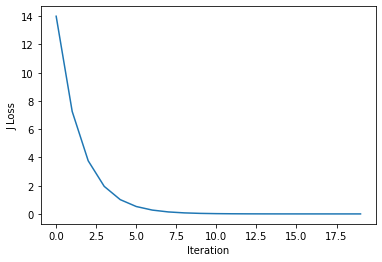

In [113]:
learning_rate = 0.01
iteracoes = 20

x = torch.arange(0, 4).float()
y = torch.arange(0, 8, 2).float()
w = torch.ones(1)

lossj=[]

for i in range(iteracoes):
    print('i =', i)
    J = J_func(w, x, y)
    print('J=', J)
    grad = (J_func(w+dw,x,y) - J_func(w-dw,x,y))/(2*dw)
    print('grad =',grad)
    w = w - learning_rate*grad
    print('w =', w)
    lossj.append(J)

# Plote o gráfico da loss J pela iteração i
import matplotlib.pyplot as plt 
plt.plot(range(iteracoes),lossj)
plt.xlabel('Iteration')
plt.ylabel('J Loss')
plt.show()

##Exercício 3.3

Repita o exercício 2 mas usando agora o calculando o gradiente usando o método backward() do pytorch. Confira se o primeiro valor do gradiente está de acordo com os valores anteriores. Execute essa próxima célula duas vezes. Os valores devem ser iguais.


i = 0
J= tensor(14., grad_fn=<SumBackward0>)
grad = tensor([-28.])
w = tensor([1.2800], grad_fn=<SubBackward0>)
i = 1
J= tensor(7.2576, grad_fn=<SumBackward0>)
grad = tensor([-20.1600])
w = tensor([1.4816], grad_fn=<SubBackward0>)
i = 2
J= tensor(3.7623, grad_fn=<SumBackward0>)
grad = tensor([-14.5152])
w = tensor([1.6268], grad_fn=<SubBackward0>)
i = 3
J= tensor(1.9504, grad_fn=<SumBackward0>)
grad = tensor([-10.4509])
w = tensor([1.7313], grad_fn=<SubBackward0>)
i = 4
J= tensor(1.0111, grad_fn=<SumBackward0>)
grad = tensor([-7.5247])
w = tensor([1.8065], grad_fn=<SubBackward0>)
i = 5
J= tensor(0.5241, grad_fn=<SumBackward0>)
grad = tensor([-5.4178])
w = tensor([1.8607], grad_fn=<SubBackward0>)
i = 6
J= tensor(0.2717, grad_fn=<SumBackward0>)
grad = tensor([-3.9008])
w = tensor([1.8997], grad_fn=<SubBackward0>)
i = 7
J= tensor(0.1409, grad_fn=<SumBackward0>)
grad = tensor([-2.8086])
w = tensor([1.9278], grad_fn=<SubBackward0>)
i = 8
J= tensor(0.0730, grad_fn=<SumBackward0>)
grad = tens

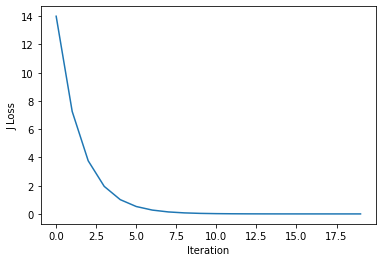

In [18]:
learning_rate = 0.01
iteracoes = 20

x = torch.arange(0, 4).float()
y = torch.arange(0, 8, 2).float()
w = torch.ones(1, requires_grad=True)

lossj=[]

for i in range(iteracoes):
    print('i =', i)
    J = J_func(w, x, y)
    lossj.append(J.detach().numpy()) #tensor to numpy
    print('J=', J)
    w.retain_grad() # retain_grad
    J.backward() #backward
    grad = w.grad
    print('grad =',grad)
    w = w - learning_rate*grad
    print('w =', w)

# Plote o gráfico da loss J pela iteração i
import matplotlib.pyplot as plt 
plt.plot(range(iteracoes),lossj)
plt.xlabel('Iteration')
plt.ylabel('J Loss')
plt.show()

##Exercício 3.4

Quais são as restrições na escolha dos valores de $\Delta w$ no cálculo do gradiente por diferenças finitas?

tensor(-27.9999)
tensor(-28.0008)
tensor(-28.0000)
tensor(-28.0000)
tensor(-28.)


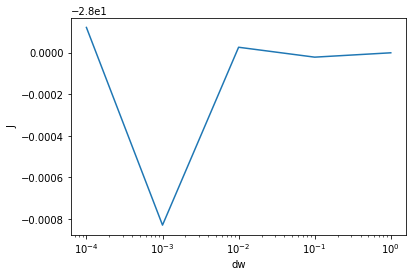

In [27]:
x = torch.arange(0, 4).float()
y = torch.arange(0, 8, 2).float()
w = torch.ones(1)
ddw = [0.0001,0.001,0.01,0.1,1] #0.00001,
val = []
for dw in ddw:
  grad = (J_func(w+dw,x,y) - J_func(w-dw,x,y))/(2*dw)
  print(grad)
  val.append(grad)

plt.plot(ddw,val)
plt.xlabel('dw')
plt.ylabel('J')
plt.xscale('log')
plt.show()

Resposta: O valor de $\Delta w$ deve ser próximo de zero, mas diferente dele. Esse valor aumenta a precisão no cálculo, mas se tivermos um grande volume de dados, o tempo de processamento aumenta. A otimização do gradiente depende diretamente de $\Delta w$.

##Exercício 3.5

Até agora trabalhamos com $w$ contendo apenas um parâmetro. Suponha agora que $w$ seja uma matriz com $N$ parâmetros e que o custo para executar $(x_i w - y_i)^2$ seja $O(N)$.
> a) Qual é o custo computacional para fazer uma única atualização (um passo de gradiente) dos parâmetros de $w$ usando o método das diferencas finitas?
>
> b) Qual é o custo computacional para fazer uma única atualização (um passo de gradiente) dos parâmetros de $w$ usando o método do backpropagation?



Resposta (justifique):

a) De acordo com a forma $\frac{\partial J}{\partial w} = \frac{J(w + \Delta w) - J(w - \Delta w)}{2 \Delta w}$, para atualizar w pela aproximação de diferenças finitas e seja w um vetor com N parâmetros, devemos executar N operações. Isso nos dá um custo computacional de $O(N^2)$.

b) Por outro lado, para atualizar via retropropagação, calcula suas derivadas parciais apenas uma vez. Para trás e para frente têm o mesmo custo computacional $O(N)$. Então o custo para backpropagation é $O(2N)$.

##Exercício 3.6

Qual o custo (entropia cruzada) esperado para um exemplo (uma amostra) no começo do treinamento de um classificador inicializado aleatoriamente?

A equação da entropia cruzada é:
$$L = - \sum_{j=0}^{K-1} y_j \log p_j, $$
Onde:

- K é o número de classes;

- $y_j=1$ se $j$ é a classe do exemplo (ground-truth), 0 caso contrário. Ou seja, $y$ é um vetor one-hot;

- $p_j$ é a probabilidade predita pelo modelo para a classe $j$.

A resposta tem que ser em função de uma ou mais das seguintes variáveis:

- K = número de classes

- B = batch size

- D = dimensão de qualquer vetor do modelo

- LR = learning rate

Resposta:

$y_j$ é definido como:
$$y_i=[0,0,1,0,0,...,0,0]$$

consideramos K classes com igual probabilidade, $p_j=\frac{1}{K}$

Operando na função:
$$L = - \sum_{j=0}^{K-1} y_j \log (p_j) $$
$$L = - \log \left( \frac{1}{K} \right) $$
$$L = \log(K)$$

o custo computacional será ~ $O(K)$

Fim do notebook.